In [37]:
import torch
from utils import Normalise
from dataset import Simulation
import fk
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from sklearn.cluster import SpectralClustering, KMeans
from utils import gradient, grad_mse_loss
from unet3d import Unet3D
from glob import glob


# filename = "/media/ep119/DATADRIVE3/epignatelli/deepexcite/train_dev_set/spiral_params5.hdf5"
filename = "/media/SSD1/epignatelli/train_dev_set/spiral_params5.hdf5"
fkset = Simulation(filename, 10, 5, 10, transform=Normalise())
model = Unet3D.load_from_checkpoint(glob("lightning_logs/version_11/checkpoints/*.ckpt")[0])
i = random.choice(range(len(fkset)))

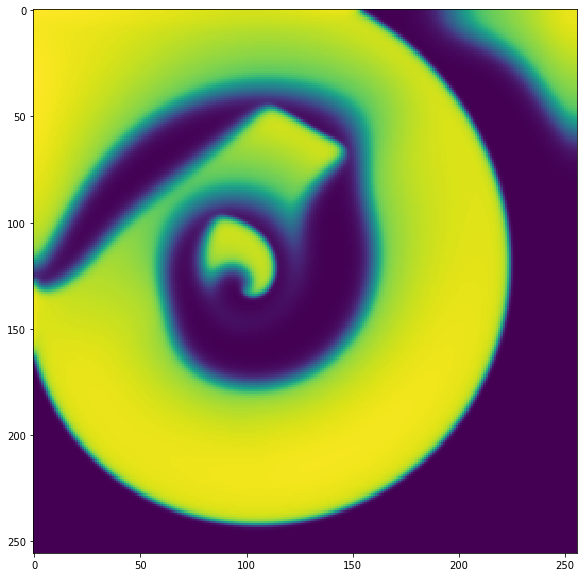

In [38]:
y, w, u = fkset[i][0]

value = u

# reshape
points = []
for i in range(len(value)):
    for j in range(value.shape[1]):
        points.append(np.array([i, j, value[i, j]]))
points = np.array(points)

# cluster
cl = KMeans(2)
cl.fit(value.flatten().reshape(-1, 1))
plt.figure(figsize=(10, 10))
im = plt.imshow(value)

In [39]:
# dx, dy = gradient(torch.as_tensor(value))
# dxx, dxy = gradient(torch.as_tensor(dx))
# dyx, dyy = gradient(torch.as_tensor(dy))

# fig, ax = plt.subplots(3, 4, figsize=(15, 12))

# ax[0, 0].set_title("dx")
# im = ax[0, 0].imshow(dx, vmin=-1, vmax=1, cmap="RdBu")

# ax[0, 1].set_title("dy")
# im = ax[0, 1].imshow(dy, vmin=-1, vmax=1, cmap="RdBu")

# ax[0, 2].set_title("dx + dy")
# im = ax[0, 2].imshow(dx + dy, vmin=-1, vmax=1, cmap="RdBu")

# ax[0, 3].set_title("torch.abs(dx) + torch.abs(dy)")
# im = ax[0, 3].imshow(torch.abs(dx) + torch.abs(dy), vmin=-1, vmax=1, cmap="RdBu")


# ax[1, 0].set_title("dxx")
# im = ax[1, 0].imshow(dxx, vmin=-1, vmax=1, cmap="RdBu")

# ax[1, 1].set_title("dxy")
# im = ax[1, 1].imshow(dxy, vmin=-1, vmax=1, cmap="RdBu")

# ax[1, 2].set_title("dxx + dxy")
# im = ax[1, 2].imshow(dxx + dxy, vmin=-1, vmax=1, cmap="RdBu")

# ax[1, 3].set_title("torch.abs(dxx) + torch.abs(dxy)")
# im = ax[1, 3].imshow(torch.abs(dxx) + torch.abs(dxy), vmin=-1, vmax=1, cmap="RdBu")


# ax[2, 0].set_title("dyx")
# im = ax[2, 0].imshow(dyx, vmin=-1, vmax=1, cmap="RdBu")

# ax[2, 1].set_title("dyy")
# im = ax[2, 1].imshow(dyy, vmin=-1, vmax=1, cmap="RdBu")

# ax[2, 2].set_title("dyx + dyy")
# im = ax[2, 2].imshow(dyx + dyy, vmin=-1, vmax=1, cmap="RdBu")

# ax[2, 3].set_title("torch.abs(dyx) + torch.abs(dyy)")
# im = ax[2, 3].imshow(torch.abs(dyx) + torch.abs(dyy), vmin=-1, vmax=1, cmap="RdBu")

In [40]:
sequence = torch.as_tensor(fkset[1500]).unsqueeze(0).float()
print(sequence.shape)
x = sequence[:, :5]
y = sequence[:, 5:]
pred = model(x)

torch.Size([1, 15, 3, 256, 256])


In [41]:
print(x.shape)
print(y.shape)
print(pred.shape)

torch.Size([1, 5, 3, 256, 256])
torch.Size([1, 10, 3, 256, 256])
torch.Size([1, 5, 3, 256, 256])


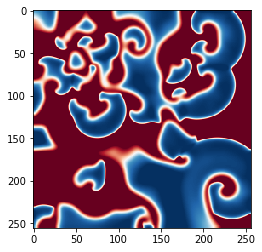

In [42]:
im = y[0, 0, 2].detach().numpy()
plt.imshow(im, vmin=-1, vmax=1, cmap="RdBu")

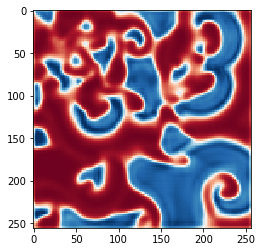

In [43]:
im = pred[0, 0, 2].detach().numpy()
plt.imshow(im, vmin=-1, vmax=1, cmap="RdBu")

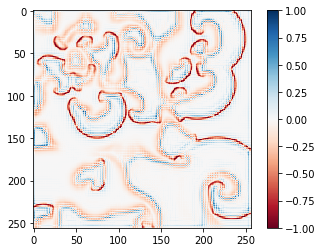

In [80]:
a, b = pred[0, 0, 2], y[0, 0, 2]
ax, ay = gradient(a)
bx, by = gradient(b)
a_grad = torch.abs(ax) + torch.abs(ay)
b_grad = torch.abs(bx) + torch.abs(by)

grad = Normalise()((a_grad.detach() - b_grad.detach()).exp())
im = plt.imshow(grad, vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar(im)

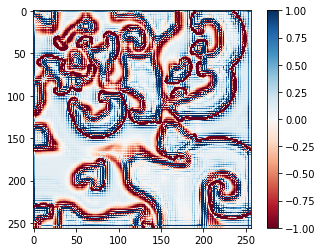

In [81]:
a, b = pred[0, 0, 2], y[0, 0, 2]
ax, ay = gradient(a)
bx, by = gradient(b)
a_grad = torch.abs(ax) + torch.abs(ay)
b_grad = torch.abs(bx) + torch.abs(by)

grad = Normalise()((a_grad.detach() - b_grad.detach()).exp())
im = plt.imshow(grad, vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar(im)

In [148]:
labels = cl.labels_.reshape(256, 256)
clusters = {}
for i in range(len(value)):
    for j in range(value.shape[1]):
        key = value[i, j]
        if key not in clusters:
            clusters[key] = []
        clusters[key].append(value[i, j])

TypeError: scatter() missing 1 required positional argument: 'y'

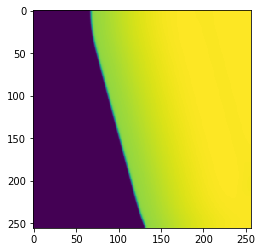

In [151]:
plt.imshow(value)
plt.scatter(clusters)